In [1]:
import pandas as pd

In [2]:
!jupyter --version
import sys
print("Python version:", sys.version)

Selected Jupyter core packages...Python version: 3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]

IPython          : 8.30.0
ipykernel        : 6.30.1
ipywidgets       : not installed
jupyter_client   : 8.6.3
jupyter_core     : 5.8.1
jupyter_server   : 2.16.0
jupyterlab       : 4.4.6
nbclient         : 0.10.2
nbconvert        : 7.16.6
nbformat         : 5.10.4
notebook         : not installed
qtconsole        : 5.6.1
traitlets        : 5.14.3


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Data loading

In [4]:
X=pd.read_csv("Train_data.csv").drop(columns=["Unnamed: 0"],axis=1)
y=pd.read_csv("Train_data_Y.csv").drop(columns=["Unnamed: 0"],axis=1)
df=pd.read_csv("anemia data from Kaggle.csv")

In [5]:
dt=X
dt["Target"]=pd.DataFrame(y)
dt.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Target
0,1,15.148357,23.236254,29.838467,83.554121,0
1,0,15.830868,25.217524,27.716110,71.970087,0
2,0,9.323844,21.080395,29.708388,71.446780,1
3,0,15.661515,15.477595,30.851349,87.645449,0
4,1,14.582923,21.016822,27.905567,98.502234,0


In [6]:
dt.shape

(13892, 6)

In [7]:
df.shape

(1421, 6)

In [8]:
dt.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Target        0
dtype: int64

In [9]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

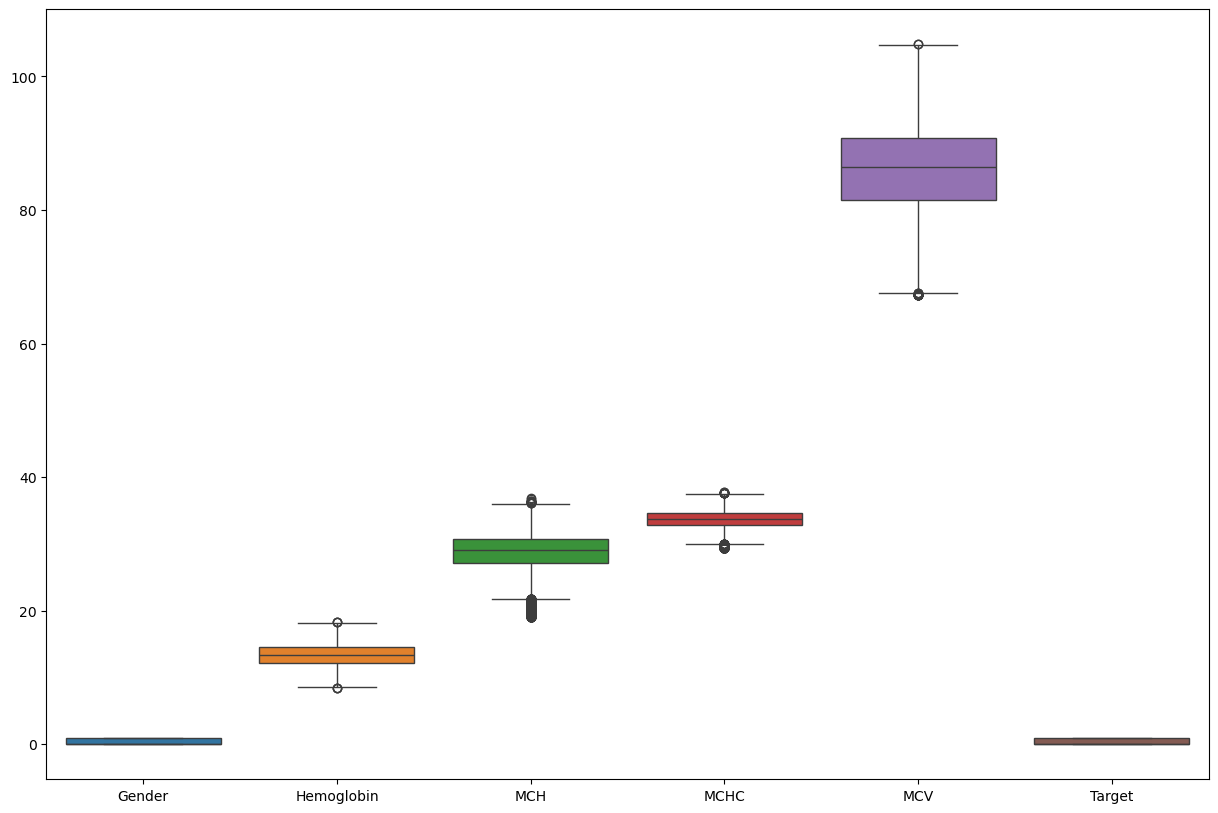

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dt)
plt.show()

In [16]:
def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    df=df[(df[column]>=low) & (df[column]<=high)]
    return df
9for i in ["Hemoglobin","MCH","MCHC","MCV"]:
    dt=remove_outliers(dt,i)

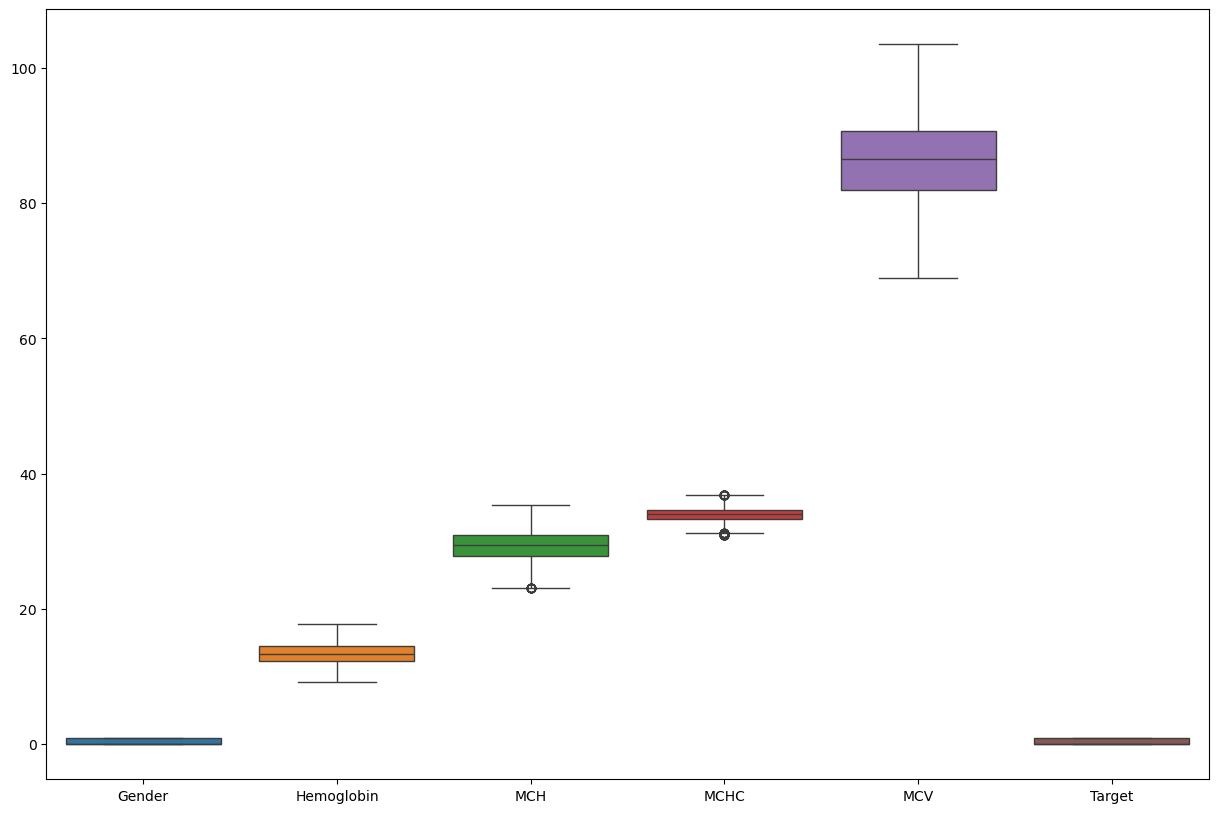

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dt)
plt.show()

In [18]:
dt.shape

(10505, 6)

In [19]:
dt.to_csv("ol_removed.csv")

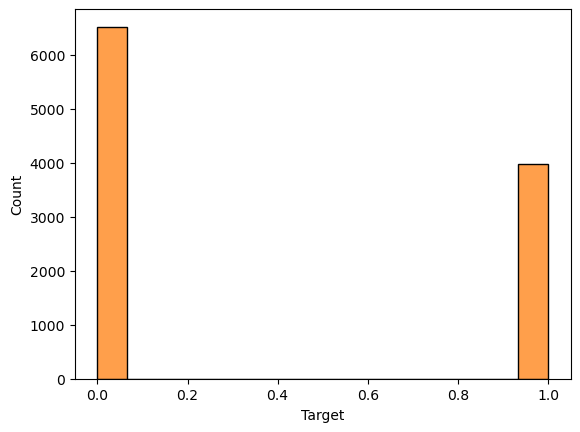

In [23]:
sns.histplot(dt["Target"])
plt.show()